In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# # disable GPU
# os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

# # seed those libraries which are included in your code
# np.random.seed(17)
# random.seed(17)
# os.environ['PYTHONHASHSEED']=str(17)

## 1) 載入資料集

In [ ]:
# !gdown --fuzzy 1wwMUr3cgoPsAwV-52dIBAeAlAtddDWFn
# !gdown --fuzzy 1YgzbEuYcq6dZGn8FKogGDU-lOJurMyHW


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df_train = pd.read_csv('/content/drive/MyDrive/AIA/Midterms/1st/Submission/Train_r.csv')
#df_train_df = pd.read_csv('/content/drive/MyDrive/AIA/DL/Kaggle/Train.csv')
#df_test_df = pd.read_csv('/content/drive/MyDrive/AIA/DL/Kaggle/Test.csv')

df_train = df_train.drop(labels=['ID'],axis=1) # 移除 Id
df_train.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Duration
count,84928.000000,84928.000000,84928.000000,84928.000000,84928.000000,84928.000000,82824.000000,81719.000000,82612.000000,83140.000000,82770.000000,81996.000000,80405.000000,84928.000000
mean,2.500000,36.924160,-93.267793,36.924345,-93.267262,0.722966,65.068289,64.291756,61.261403,29.225585,9.256541,7.864908,0.006536,1.333398
std,1.118041,5.012491,17.208842,5.012777,17.207988,2.174698,17.379606,18.787425,25.397146,1.203373,2.611186,5.684704,0.043651,21.980977
min,1.000000,24.586250,-124.483021,24.587610,-124.482798,0.000000,-8.000000,-29.000000,2.000000,20.040000,0.000000,0.000000,0.000000,0.004167
25%,1.750000,33.495210,-111.414025,33.495210,-111.400794,0.000000,53.000000,53.000000,42.000000,29.070000,10.000000,5.000000,0.000000,0.020833
50%,2.500000,37.672920,-86.938541,37.675090,-86.931545,0.048000,66.000000,66.000000,64.000000,29.580000,10.000000,7.000000,0.000000,0.034699
75%,3.250000,40.707489,-78.782070,40.706600,-78.781125,0.648000,78.000000,78.000000,83.000000,29.920000,10.000000,12.000000,0.000000,0.086933
max,4.000000,48.990823,-69.984700,48.991585,-69.984700,112.968000,116.000000,116.000000,100.000000,38.940000,120.000000,232.000000,1.950000,1096.707639


In [9]:
df_train.head()

,Source,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Duration
0,Source1,2,33.944331,-84.509958,33.937641,-84.499248,0.768,Incident on I-75 SB near GA-120 Expect long de...,I-75,Marietta,...,False,False,False,False,False,Day,Day,Day,Day,0.065278
1,Source1,3,42.428670,-87.903940,42.428670,-87.903940,0.000,At CR-22/CR-W27/N Delany Rd - Accident.,W Wadsworth Rd,Wadsworth,...,False,False,False,True,False,Day,Day,Day,Day,0.020833
2,Source1,1,40.897740,-73.797030,40.897740,-73.797030,0.000,At Hutchinson Pky/Exit 14 - Accident.,New England Trwy S,New Rochelle,...,False,False,False,False,False,Day,Day,Day,Day,0.020833
3,Source1,4,35.656830,-118.440450,35.656480,-118.444170,0.210,Closed at Lake Isabella Blvd - Road closed due...,Yankee Canyon Dr,Lake Isabella,...,False,False,False,False,False,Night,Night,Night,Night,0.019757
4,Source1,3,42.428360,-83.184290,42.428360,-83.184290,0.000,At Meyers Rd - Accident.,John C Lodge Fwy S,Detroit,...,False,False,False,False,False,Day,Day,Day,Day,0.020833


## 2) 檢查缺失值

In [10]:
# checked missing data
print("Before data clean(NAN mount):", len(df_train[df_train.isna().any(axis=1)]))

Before data clean(NAN mount): 6599


In [11]:
df_train=df_train.dropna()

In [12]:
unique_col = []
for i in df_train.columns:
    if np.unique(df_train[i]).shape[0]==1:
        unique_col.append(i)

In [13]:
unique_col

['Source', 'Country', 'Turning_Loop']

In [ ]:
# df_train.describe()[unique_col]

In [14]:
df_train = df_train.drop(unique_col, axis=1)

In [15]:
df_train.shape

(78329, 41)

## 3) 資料前處理

#### **特徵標準化**
通常有兩種標準化的方法：
- min max normalization：
    - 會將特徵數據按比例縮放到 0 到 1 的區間，（或是 -1 到 1）。
- standard deviation normalization：
    - 會將所有特徵數據縮放成平均為 0、平方差為 1。
    
#### **特徵組合**
特徵需要適當地增加和減少，以提升精確度並減少計算時間。
- 增加特徵：特徵組合 (Feature Combination)、群聚編碼 (GroupBy Encoding)、產生合成樣本 (Oversampling)
- 減少特徵：特徵篩選 (Feature Selection)、剔除一些樣本 (Undersampling)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78329 entries, 0 to 84927
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Severity               78329 non-null  int64  
 1   Start_Lat              78329 non-null  float64
 2   Start_Lng              78329 non-null  float64
 3   End_Lat                78329 non-null  float64
 4   End_Lng                78329 non-null  float64
 5   Distance(mi)           78329 non-null  float64
 6   Description            78329 non-null  object 
 7   Street                 78329 non-null  object 
 8   City                   78329 non-null  object 
 9   County                 78329 non-null  object 
 10  State                  78329 non-null  object 
 11  Zipcode                78329 non-null  object 
 12  Timezone               78329 non-null  object 
 13  Airport_Code           78329 non-null  object 
 14  Weather_Timestamp      78329 non-null  object 
 15  Tempera

In [18]:
def data_preprocessing(df_input, train=True, preprocessors=None):
    #df_input['Duration'] = (pd.to_datetime(df_input['End_Time']) - pd.to_datetime(df_input['Start_Time'])).dt.total_seconds()
    #df_input['Start_Time'] = pd.to_datetime(df_input['Start_Time'])

    keywords = ['closed', 'accident', 'blocked', 'stationary traffic', 'crash', 'injuries',
                'overturned vehicle', 'construction work', 'delays', 'road closed',
                'alternate route', 'caution', 'lanes closed', 'shoulder blocked',
                'lane blocked', 'traffic problem', 'serious accident', 'investigation work', 'danger', 'vehicle crash']

    for keyword in keywords:
        df_input[keyword] = df_input['Description'].apply(lambda x: int(keyword in x.lower()))

    drop_columns = ['Description', 'End_Lat', 'End_Lng' , 'Weather_Timestamp',  'Airport_Code']
    df_input = df_input.drop(columns=drop_columns)

    if train:
        numeric_features = df_input.select_dtypes(include=['number']).drop(columns=['Severity']).columns
        numeric_transformer = StandardScaler()

        categorical_features = df_input.select_dtypes(include=['object']).columns
        categorical_transformer = OneHotEncoder(handle_unknown='ignore')

        preprocessors = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])

        X_processed = preprocessors.fit_transform(df_input)
    else:
        if preprocessors is None:
            raise ValueError("Preprocessors must be provided for test data")
        X_processed = preprocessors.transform(df_input)

    return X_processed, preprocessors

In [19]:
# 從預處理器中獲取數值特徵的標準化統計數據
X, preprocessors = data_preprocessing(df_train)
train_sc = preprocessors.named_transformers_['num']
print(train_sc.mean_)
print(train_sc.var_)
print(X.shape[1])

[ 3.69648327e+01 -9.29355984e+01  7.25779558e-01  6.48898875e+01
  6.41189853e+01  6.17950823e+01  2.92445527e+01  9.24843774e+00
  7.87343130e+00  6.55389447e-03  1.40834741e+00  2.43307077e-01
  7.37504628e-01  2.22701681e-01  3.38188921e-02  3.20315592e-02
  3.19166592e-04  7.37913161e-03  5.18326546e-03  5.00580883e-02
  1.77201292e-01  6.72037177e-02  8.83070127e-02  1.23964304e-02
  7.22082498e-02  1.06435675e-01  1.16814973e-02  1.84350624e-02
  2.56609940e-03  1.63413295e-03  1.42986633e-02]
[2.57051083e+01 2.91392336e+02 4.68396260e+00 3.01624549e+02
 3.52127169e+02 6.26650996e+02 1.39481922e+00 6.69150809e+00
 3.23424683e+01 1.92272202e-03 5.14273538e+02 1.84108743e-01
 1.93591552e-01 1.73105642e-01 3.26751746e-02 3.10055384e-02
 3.19064725e-04 7.32468003e-03 5.15639922e-03 4.75522761e-02
 1.45800994e-01 6.26873780e-02 8.05088842e-02 1.22427590e-02
 6.69942185e-02 9.51071222e-02 1.15450399e-02 1.80952108e-02
 2.55951454e-03 1.63146256e-03 1.40942116e-02]
50523


In [24]:
# 獲取 one-hot encoder 轉換器
categorical_transformer = preprocessors.named_transformers_['cat']

# 查看 categorical_transformer 中每個類別特徵的唯一類別值
categories = categorical_transformer.categories_

# 統計每個原始類別特徵對應的類別數量，迭代處理 One-Hot Encoding 中的每一個類別特徵，並計算它們的唯一值數量
number_of_classes = {feature: len(categories[idx]) for idx, feature in enumerate(preprocessors.transformers_[1][2])}

print(number_of_classes)

{'Street': 20090, 'City': 5354, 'County': 1128, 'State': 49, 'Zipcode': 23782, 'Timezone': 4, 'Wind_Direction': 18, 'Weather_Condition': 59, 'Sunrise_Sunset': 2, 'Civil_Twilight': 2, 'Nautical_Twilight': 2, 'Astronomical_Twilight': 2}


In [23]:
print(X.shape)

(78329, 50523)


## 4) One hot encoding
對`Cover Type`輸出欄位的資料做 one-hot encoding，使用 Keras 提供的工具函式 to_categorical 將每筆資料的輸出值 y 轉換成一個向量。

In [25]:
y = df_train['Severity'].values
y=y-1

In [26]:
np.unique(y)

array([0, 1, 2, 3])

In [27]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [28]:
y.shape

(78329, 4)

In [29]:
np.unique(y, axis=0)

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

## 5) 切割訓練集與測試集

In [30]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(X, y, test_size=0.3, random_state=17, stratify=y)

<BarContainer object of 4 artists>

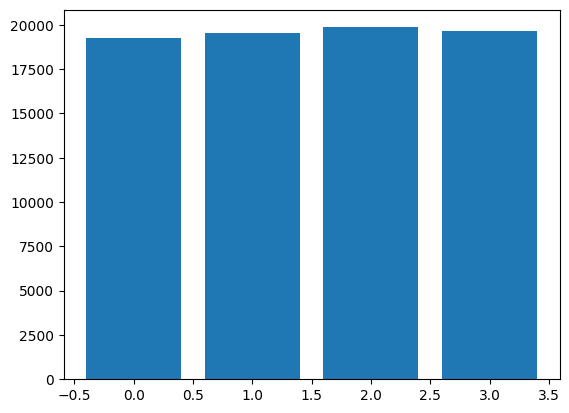

In [31]:
unique, counts = np.unique(y.argmax(-1), return_counts=True)
plt.bar(unique, counts)

<BarContainer object of 4 artists>

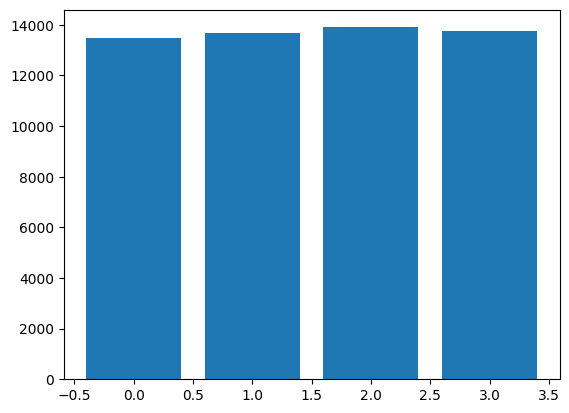

In [32]:
unique, counts = np.unique(y_train.argmax(-1), return_counts=True)
plt.bar(unique, counts)

In [33]:
print('訓練資料: ', X_train.shape, '\t訓練目標: ', y_train.shape)
print('驗證資料: ', X_valid.shape, '\t驗證目標: ', y_valid.shape)

訓練資料:  (54830, 50523) 	訓練目標:  (54830, 4)
驗證資料:  (23499, 50523) 	驗證目標:  (23499, 4)


## 6) 建立網路模型

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Nadam

print(tf.__version__)

2.15.0


In [35]:
X_train.shape[1:]

(50523,)

In [36]:
#tensorfloq相關套件
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, LayerNormalization,LSTM,Conv1D, Input
from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.layers import LeakyReLU
from keras.layers import Dropout

print(tf.__version__)

2.15.0


In [37]:

def build_model(X):
    model = Sequential()
    model.add(Dense(32, input_shape=X.shape[1:]))
    model.add(BatchNormalization())
    model.add(Dense(64,activation=LeakyReLU(0.1)))
    model.add(BatchNormalization())
    model.add(Dense(128,activation=LeakyReLU(0.1)))
    model.add(BatchNormalization())
    model.add(Dense(256,activation=LeakyReLU(0.1)))
    model.add(BatchNormalization())
    model.add(Dense(256,activation=LeakyReLU(0.1)))
    model.add(BatchNormalization())
    model.add(Dense(256,activation=LeakyReLU(0.1)))
    model.add(BatchNormalization())
    model.add(Dense(128,activation=LeakyReLU(0.1)))
    model.add(BatchNormalization())
    model.add(Dense(64,activation=LeakyReLU(0.1)))
    model.add(BatchNormalization())
    model.add(Dense(32,activation=LeakyReLU(0.1)))
    model.add(BatchNormalization())
    model.add(Dense(4,activation="softmax"))
    return model

In [ ]:
tf.keras.backend.clear_session()
model = build_model(X_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1616832   
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_2 (Bat  (None, 128)               5

In [ ]:
model.layers

In [ ]:
model.layers[0].trainable_weights

[<tf.Variable 'dense/kernel:0' shape=(50525, 32) dtype=float32, numpy=
 array([[-0.00431765,  0.00983014, -0.0027913 , ..., -0.01087483,
         -0.009811  ,  0.00542315],
        [-0.00281685,  0.0065946 ,  0.0101741 , ...,  0.0047077 ,
          0.00532765, -0.00304264],
        [-0.00027634, -0.00990064,  0.01039324, ..., -0.01060772,
          0.00197836,  0.0010002 ],
        ...,
        [-0.01040226,  0.00998266,  0.01015499, ...,  0.00689405,
         -0.00968431, -0.00719248],
        [ 0.00016882, -0.00195836, -0.00868017, ..., -0.01045017,
         -0.00091315,  0.00126028],
        [-0.00295462,  0.0040408 ,  0.00676959, ...,  0.00617937,
         -0.00737231, -0.00887928]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(32,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>]

In [ ]:
# 編譯模型
optim = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,   # w_new = w_old - learning_rate * gradient
              metrics=['acc'])

In [ ]:
rlp = callbacks.ReduceLROnPlateau(
   monitor='val_loss',  # 是否進步的指標
    factor=0.1,  # 以 factor 的倍數調整 learning rate
    patience=5,  # 經過 patience 次沒有進步調整 learning rate
    verbose=2,
    mode='min')

In [ ]:
batch_size = 512
epochs = 30

# 訓練模型
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True, callbacks=[rlp])

Epoch 1/30
108/108 [==============================] - 22s 117ms/step - loss: 0.4654 - acc: 0.8301 - val_loss: 1.3396 - val_acc: 0.2605 - lr: 0.0010
Epoch 2/30
108/108 [==============================] - 5s 48ms/step - loss: 0.2556 - acc: 0.9062 - val_loss: 1.0321 - val_acc: 0.5190 - lr: 0.0010
Epoch 3/30
108/108 [==============================] - 5s 43ms/step - loss: 0.1877 - acc: 0.9283 - val_loss: 0.6720 - val_acc: 0.7274 - lr: 0.0010
Epoch 4/30
108/108 [==============================] - 3s 24ms/step - loss: 0.1434 - acc: 0.9446 - val_loss: 0.3987 - val_acc: 0.8660 - lr: 0.0010
Epoch 5/30
108/108 [==============================] - 2s 21ms/step - loss: 0.1176 - acc: 0.9542 - val_loss: 0.4056 - val_acc: 0.8703 - lr: 0.0010
Epoch 6/30
108/108 [==============================] - 3s 29ms/step - loss: 0.1052 - acc: 0.9583 - val_loss: 0.4571 - val_acc: 0.8742 - lr: 0.0010
Epoch 7/30
108/108 [==============================] - 3s 31ms/step - loss: 0.0910 - acc: 0.9635 - val_loss: 0.4647 - val_a

## 7) 觀察訓練結果

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])

In [ ]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

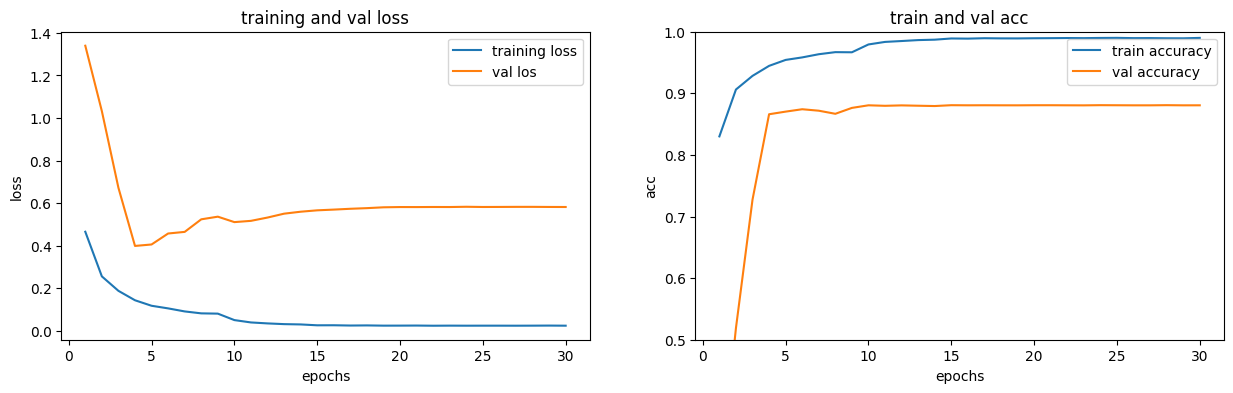

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.ylim((0.5, 1))
plt.legend()

## 觀察訓練集上的成效

In [ ]:
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print(f'loss:{loss}, accuracy:{acc}')

loss:0.021278999745845795, accuracy:0.9907897114753723


## 觀察驗證集上的成效

In [ ]:
from sklearn.metrics import accuracy_score
label= np.argmax(y_valid,axis=1)
pred = np.argmax(model.predict(X_valid), axis=1)
accuracy_score(label, pred)

735/735 [==============================] - 3s 3ms/step


0.880548108430146

In [ ]:
model.predict(X_valid)[:10]

735/735 [==============================] - 3s 4ms/step


array([[9.9924278e-01, 5.0687562e-05, 5.8204070e-04, 1.2441279e-04],
       [7.2333416e-05, 9.9986279e-01, 1.3332990e-05, 5.1495521e-05],
       [4.1214011e-05, 8.4771869e-05, 8.6912478e-05, 9.9978715e-01],
       [6.5765758e-05, 3.7738842e-05, 9.9896431e-01, 9.3216548e-04],
       [1.2303131e-03, 3.6034209e-04, 8.4288031e-01, 1.5552898e-01],
       [1.0709678e-01, 8.8434917e-01, 5.1871869e-03, 3.3669565e-03],
       [2.6493524e-03, 1.0581816e-04, 9.9603975e-01, 1.2050271e-03],
       [1.3903138e-05, 9.9990404e-01, 1.8591880e-05, 6.3418564e-05],
       [9.9728179e-01, 2.5831256e-04, 1.6839253e-03, 7.7591900e-04],
       [9.6729416e-01, 6.8066404e-03, 2.3639865e-02, 2.2593352e-03]],
      dtype=float32)

In [ ]:
model.predict(X_valid)[:10].argmax(-1)

735/735 [==============================] - 2s 3ms/step


array([0, 1, 3, 2, 2, 1, 2, 1, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label, pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5779
           1       0.93      0.90      0.91      5863
           2       0.83      0.86      0.85      5959
           3       0.87      0.88      0.87      5898

    accuracy                           0.88     23499
   macro avg       0.88      0.88      0.88     23499
weighted avg       0.88      0.88      0.88     23499



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(label, pred))

[[5102   72  542   63]
 [ 100 5271  110  382]
 [ 421   75 5126  337]
 [  66  260  379 5193]]


## 預測 test.csv

In [ ]:
    # 載入測試數據
df_test = pd.read_csv('Test.csv')

# 假設 unique_col 和 preprocessors 已經從訓練階段獲得
#df_test = df_test.drop(unique_col, axis=1)  # 移除在訓練集中沒有變化的列
df_test = df_test.drop(labels=['ID'], axis=1)  # 移除 ID 列
df_test = df_test.drop(labels=['Source','Country','Turning_Loop'],axis=1)

# 在應用預處理之前，為測試數據計算 Duration
#start_times = pd.to_datetime(df_test['Start_Time'])
#end_times = pd.to_datetime(df_test['End_Time'])
#df_test['Duration'] = (end_times - start_times).dt.total_seconds()

keywords = ['closed', 'accident', 'blocked', 'stationary traffic', 'crash', 'injuries',
            'overturned vehicle', 'construction work', 'delays', 'road closed',
            'alternate route', 'caution', 'lanes closed', 'shoulder blocked',
            'lane blocked', 'traffic problem', 'serious accident', 'investigation work',
            'danger', 'vehicle crash']

#關鍵字提取
if 'Description' in df_test.columns:
  for keyword in keywords:
        df_test[keyword] = df_test['Description'].apply(lambda x: int(keyword in x.lower()))

# 確保移除所有在預處理函數中移除的其他列，包括時間列如果它們不再需要
df_test = df_test.drop(columns=['Description', 'End_Lat', 'End_Lng' , 'Weather_Timestamp',  'Airport_Code'])

# 使用之前訓練時儲存的 preprocessors 來轉換測試數據
test = preprocessors.transform(df_test)



In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78329 entries, 0 to 84927
Data columns (total 64 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Source                 78329 non-null  object 
 1   Severity               78329 non-null  int64  
 2   Start_Lat              78329 non-null  float64
 3   Start_Lng              78329 non-null  float64
 4   End_Lat                78329 non-null  float64
 5   End_Lng                78329 non-null  float64
 6   Distance(mi)           78329 non-null  float64
 7   Description            78329 non-null  object 
 8   Street                 78329 non-null  object 
 9   City                   78329 non-null  object 
 10  County                 78329 non-null  object 
 11  State                  78329 non-null  object 
 12  Zipcode                78329 non-null  object 
 13  Country                78329 non-null  object 
 14  Timezone               78329 non-null  object 
 15  Airport

In [ ]:
df_train.head()

In [ ]:
pred = model.predict(test)

In [ ]:
pred.argmax(-1)

In [ ]:
predic_class=np.argmax(pred,axis=1)
predic_class=predic_class+1
predic_class

In [ ]:
df_test = pd.read_csv('Test.csv')
ans = df_test[['ID']]

In [ ]:
ans

In [ ]:
ans.loc[:, 'Severity'] = list(predic_class)

In [ ]:
ans

In [ ]:
ans.to_csv('ans.csv', index=False)